This is a working notebook for exploring expanding and applying the SVM model developed for the Koumassi and Southeast AOIs in Abidjan, Ivory Coast, to include reference points from teh flooded image of Beira, Mozambique in March 2019. 

For full WV-2 images, it is recommended to use the GBDX platform to apply the model to smaller image windows which can be mosaic'ed back together.  

Inputs to model include combination of index raw values for:
"Dark" parameter, MBI, MSI, NDVI, NDWIcoastal, NDWIcoastal-MSI, NDWIyellow, NDWIyellow-MSI
These index values are calculated using the notebook "explorations_calculating_spectral_indices_beira.ipynb"

The "Dark" parameter is the sum of the red_edge, NIR1 and NIR2 bands. 

In [1]:
# Import necessary packages
import os
import pickle
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es

In [2]:
# Define AOI and paths
aoi = 'beira_ps'
band_path = '..\\data\\'+aoi+"\\"
raster_outputs_path = os.path.join(band_path, "explorations_outputs\\raster_files\\")

raw_list = glob(raster_outputs_path+"\\"+"*raw*")
raw_list.sort()

all_bands_path = os.path.join(raster_outputs_path + aoi+"_all_bands.tif")
svm_clf_path = "C:\\Users\\katy\\git\\flood-detection\\data\\combined\\"
# svm_additional_pts_clf_path = "C:\\Users\\katy\\git\\flood-detection\\data\\combined\\vector_data\\"
svm_outputs_path = os.path.join(band_path, "explorations_outputs\\svm\\")
try:
    os.makedirs(svm_outputs_path)
except FileExistsError:
    print("band_path directory already exists!")

In [3]:
# Get meta data for writing out SVM result
with rio.open(all_bands_path) as src:
    all_bands_stack = src.read()
    stack_meta = src.meta
    files_out_meta = src.meta.copy()
files_out_meta['count']=1

In [3]:
# Set paths for validation data inputs
validation_data_path = os.path.join('..\\data\\beira_ps\\validation\\')
beira_sample_pts = gpd.read_file(
    validation_data_path+"vector-data\\validationpoints_beira.shp")

In [12]:
valid_data_beira = pd.read_csv(
    validation_data_path+"validationpoints_beira.csv")

In [13]:
valid_data_beira.head()
# for i in range(1,5):
valid_data_beira['ClassValue'].value_counts()
# valid_data_beira.shape

3    163
2    163
1    163
4    162
Name: ClassValue, dtype: int64

# Apply and plot SVM model

In [4]:
# Load saved SVM classifer
loaded_clf = pickle.load(open(svm_clf_path+'pickle_combined_svm_final', 'rb'))

In [5]:
# Apply saved classifer to new image 
index_stack, meta = es.stack(raw_list)
index_im = np.rollaxis(index_stack, 0, 3)
X_index = index_im.reshape(-1,8)
predictedClass = loaded_clf.predict(X_index)

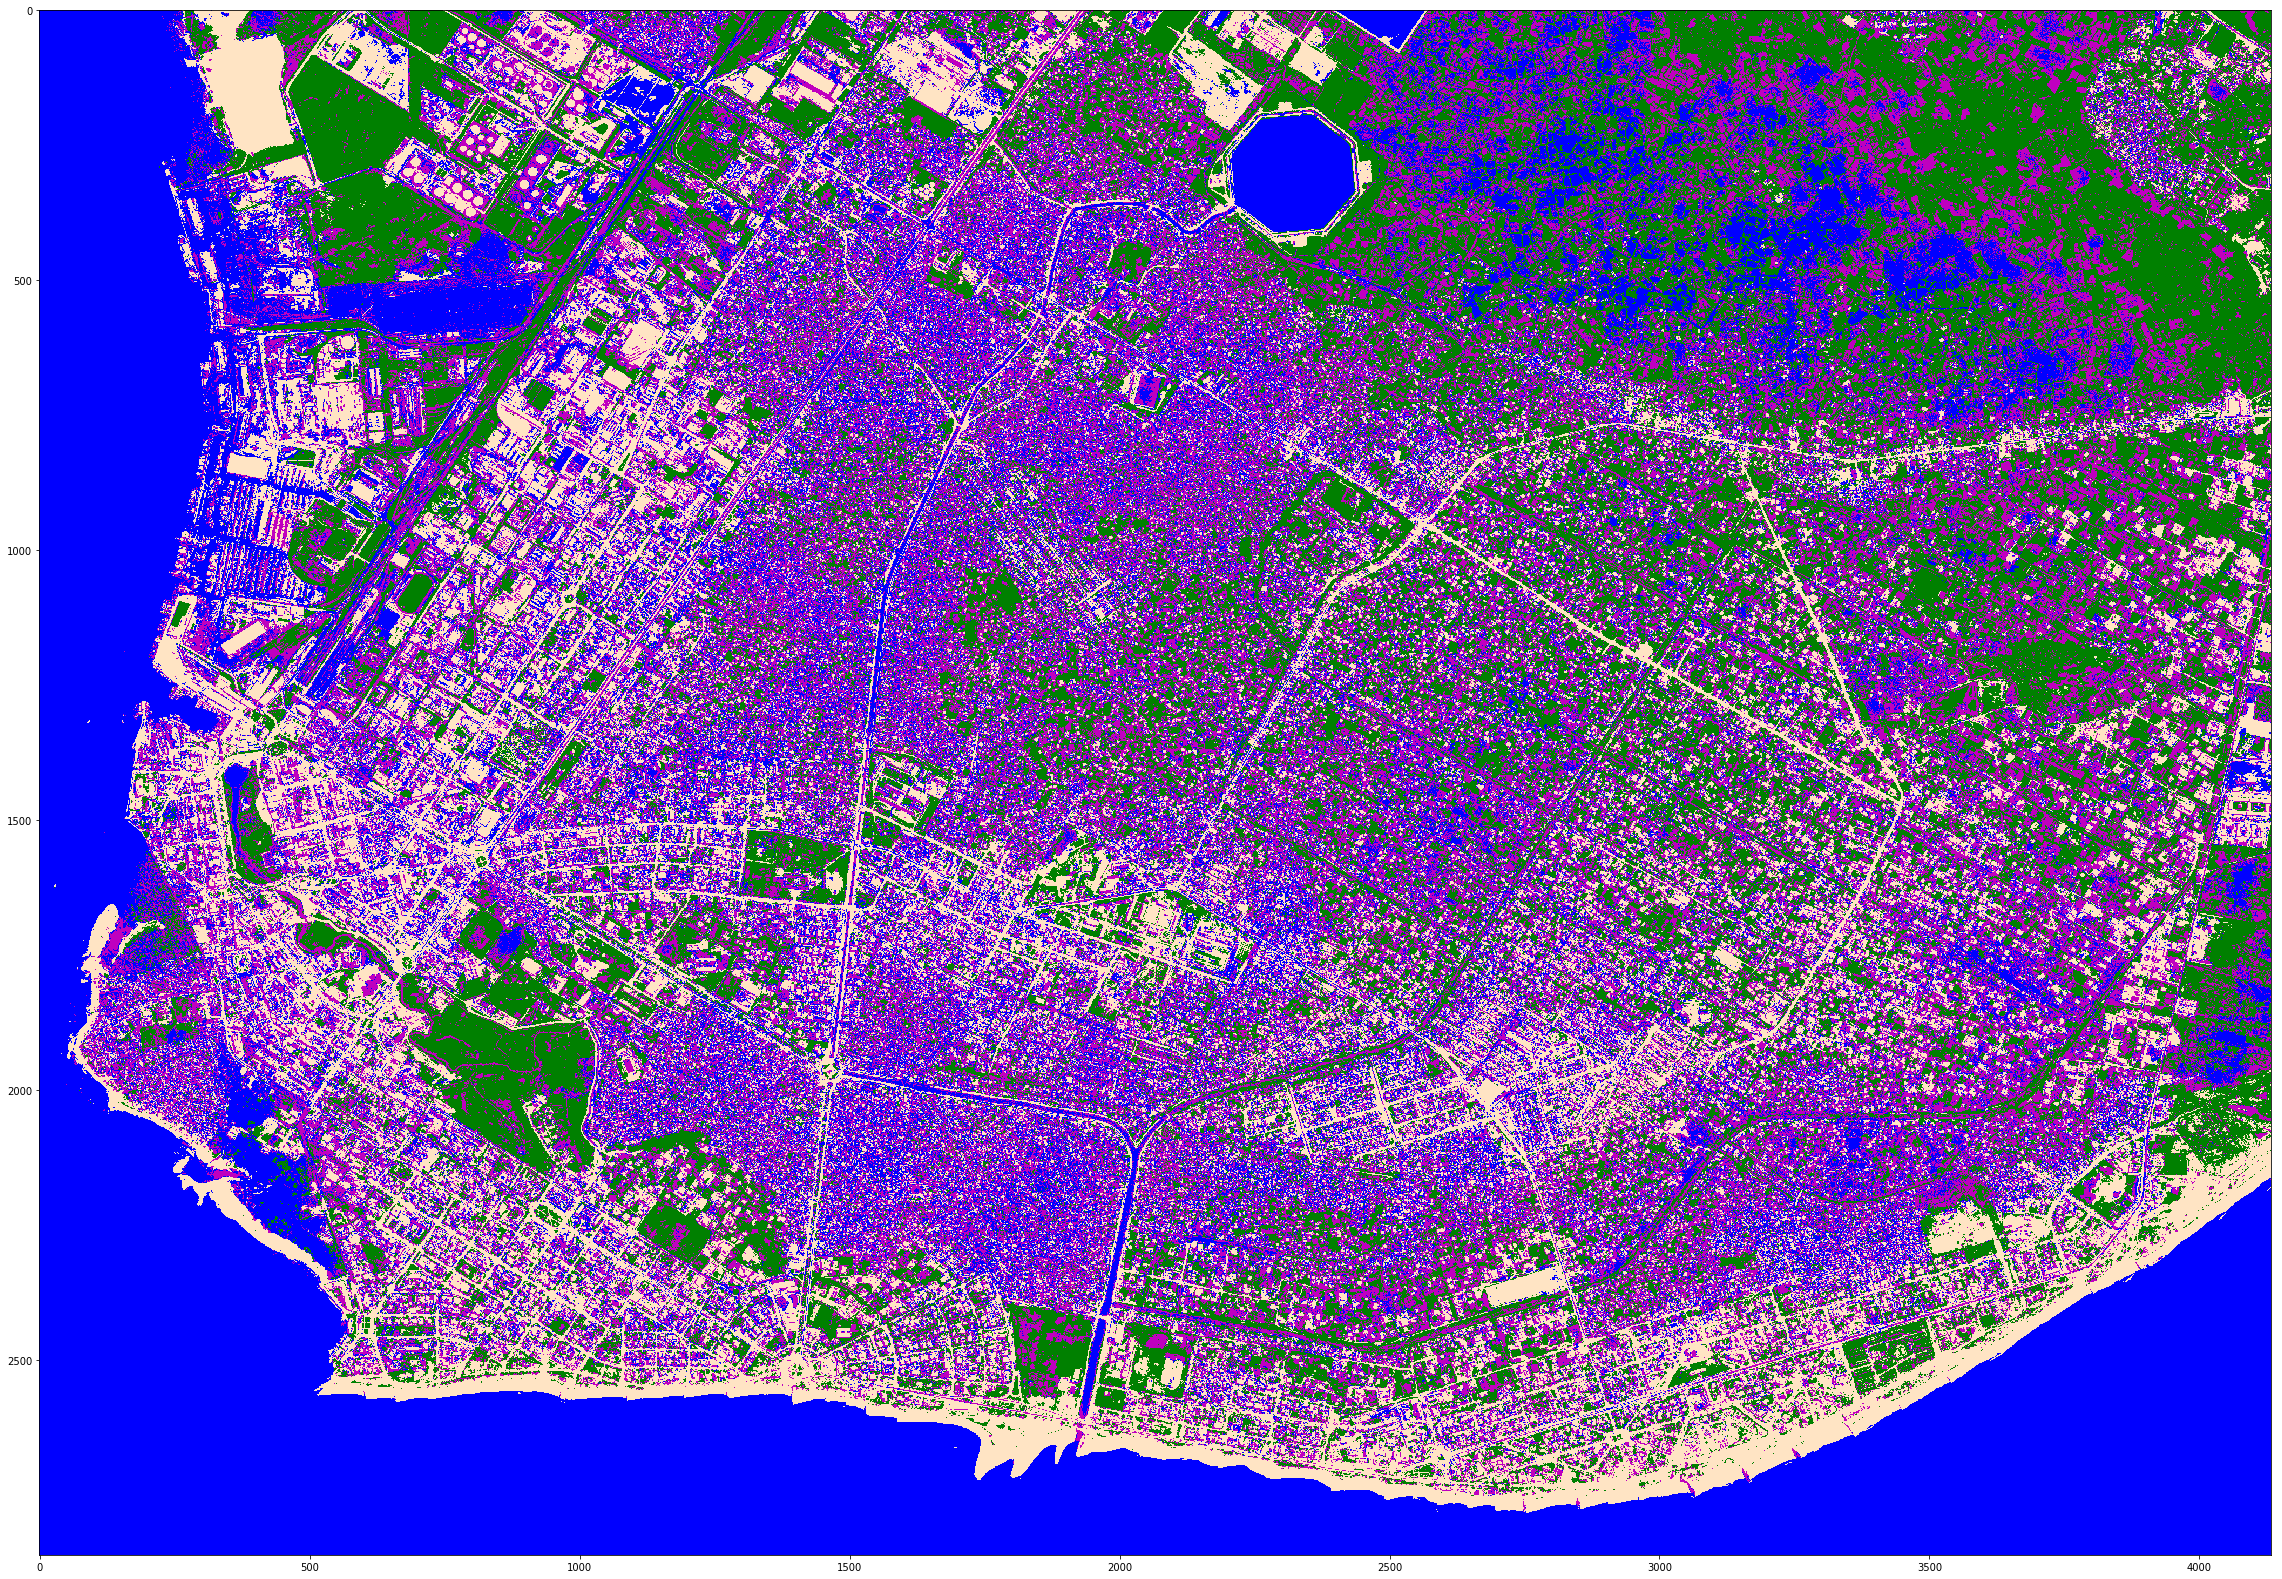

In [7]:
# Plot result
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','bisque'])
im = ax.imshow(pred_data,cmap=cmap)
plt.show()

# Write out result
with rio.open(svm_outputs_path+'SVM_map_updated_additional_points.tif', 'w', **files_out_meta) as dst:
    dst.write(pred_data.astype('float32'),1)

# Change visualization so "shadow" is presented as vegetation instead

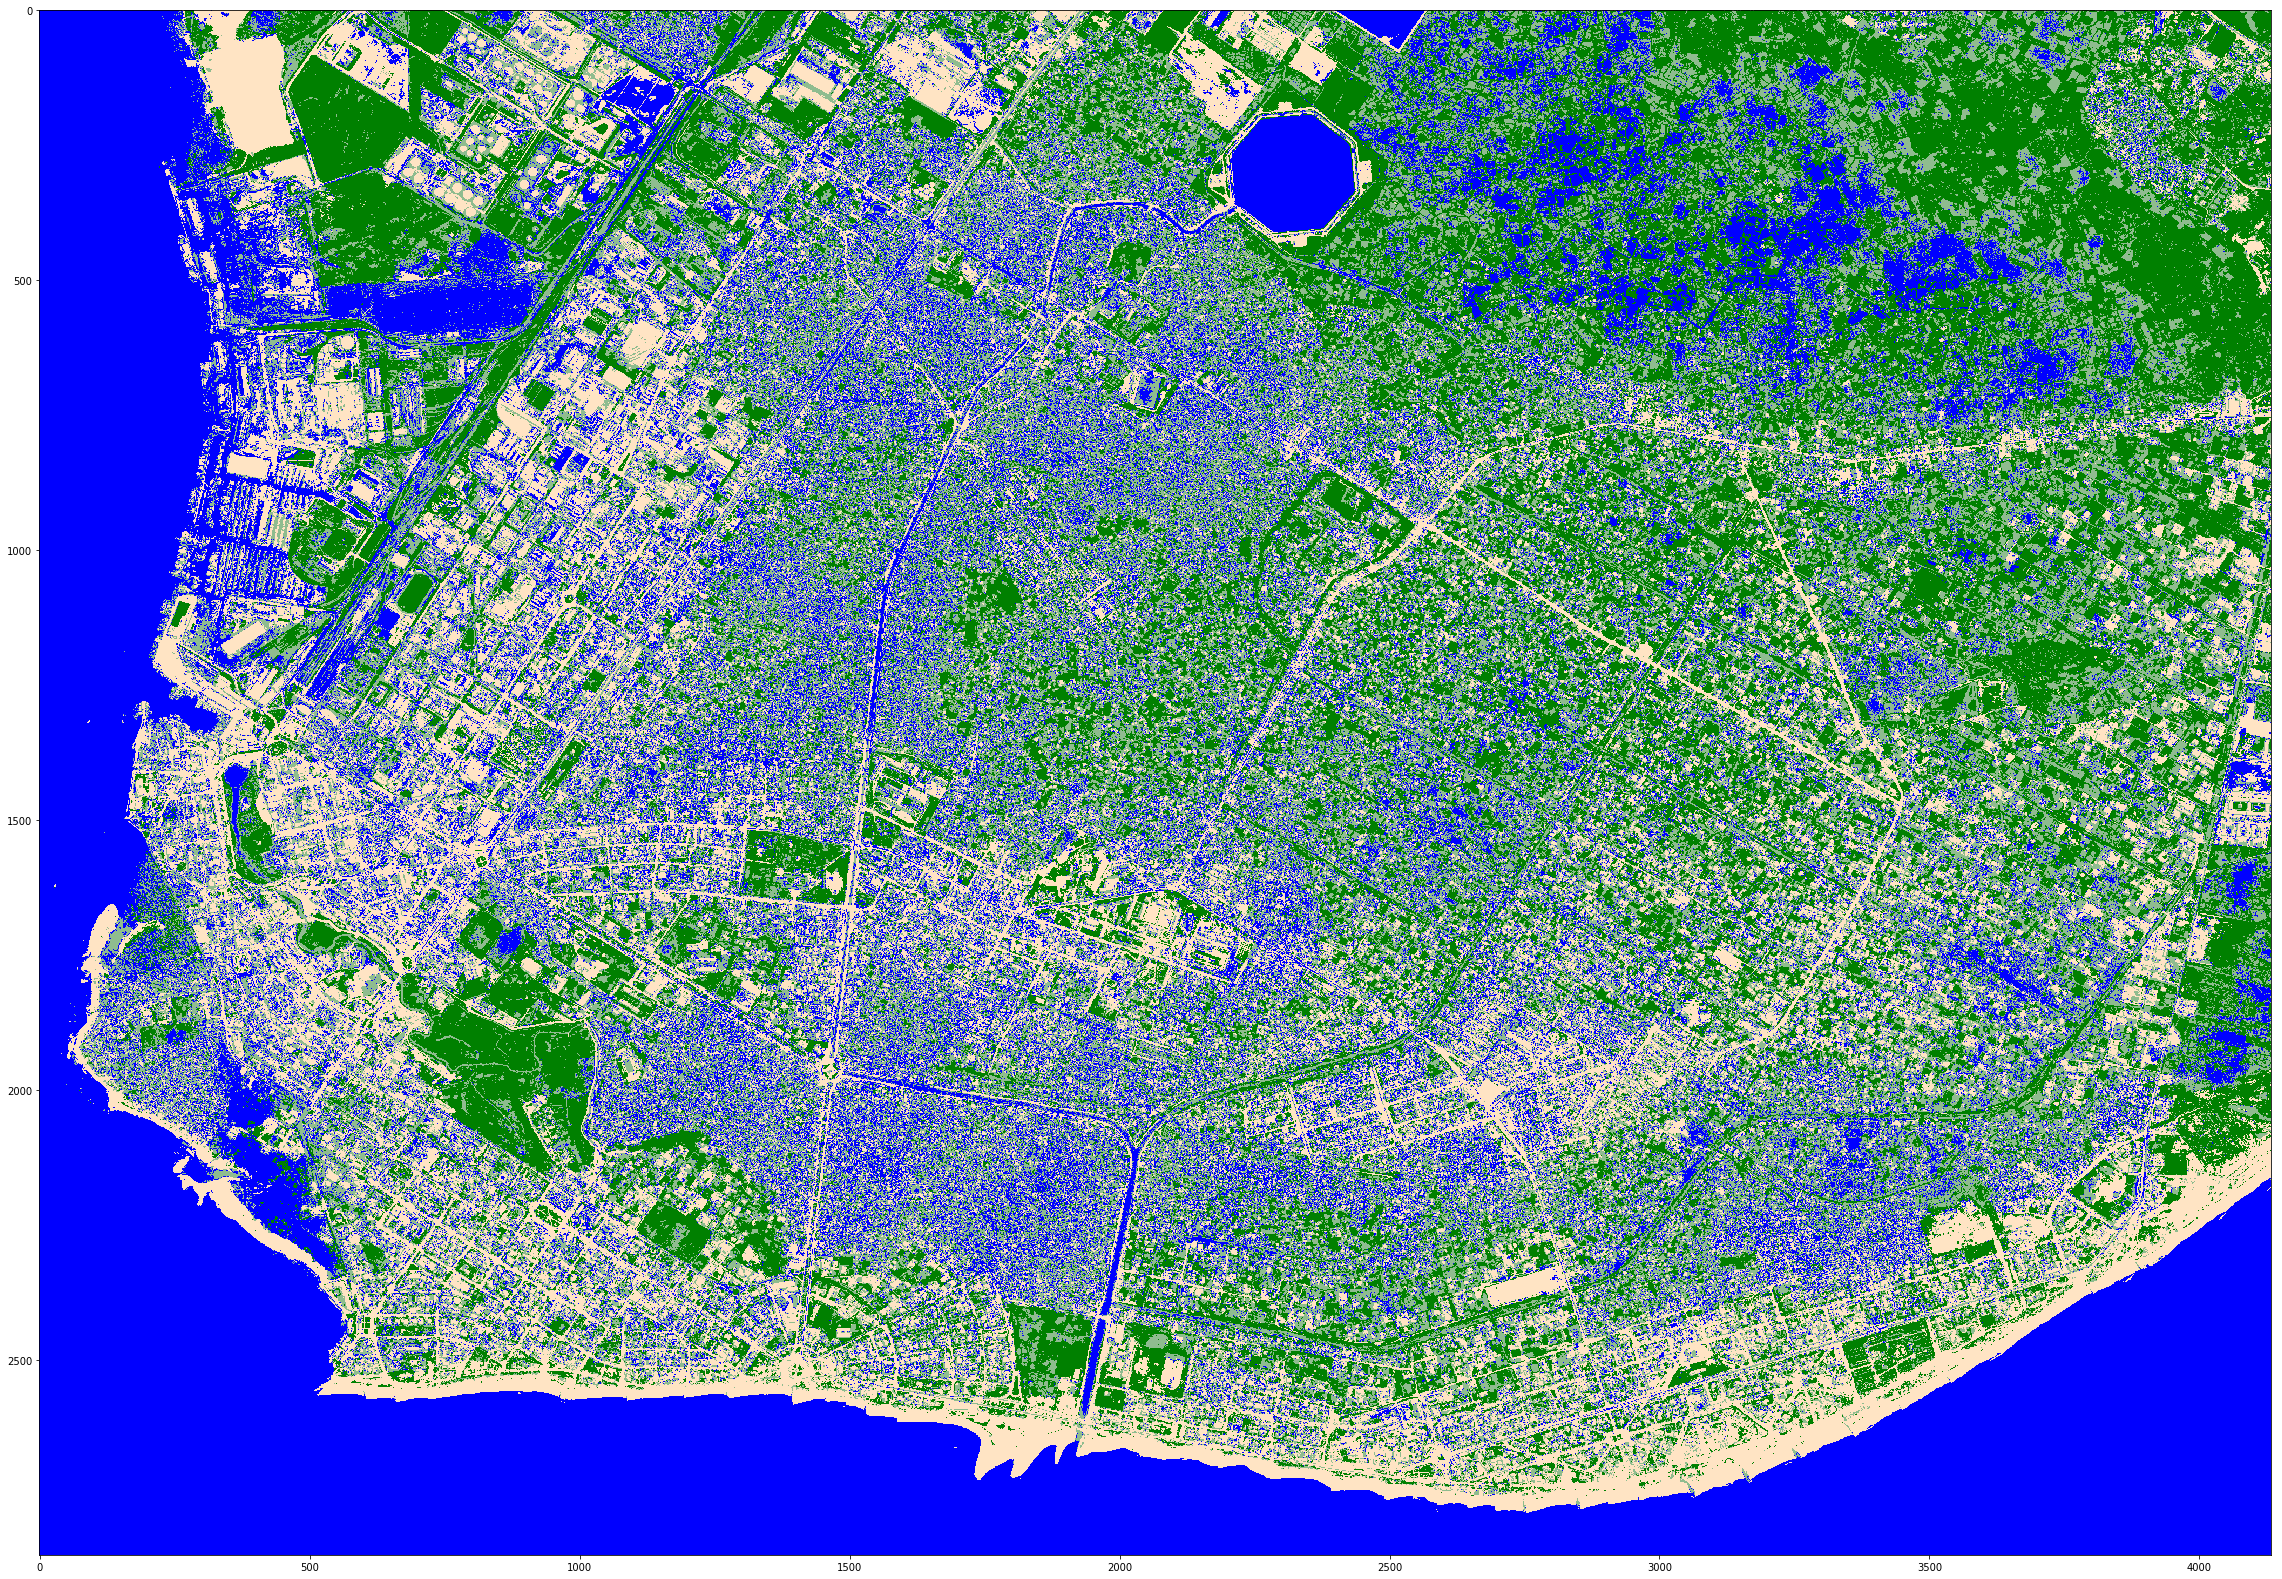

In [9]:
# Plot result
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data = predictedClass.reshape(index_im.shape[:2])
cmap = ListedColormap(['darkseagreen','blue','green','bisque'])
im = ax.imshow(pred_data,cmap=cmap)
plt.show()

# Write out result
with rio.open(svm_outputs_path+'SVM_map_updated_additional_points.tif', 'w', **files_out_meta) as dst:
    dst.write(pred_data.astype('float32'),1)

# Apply and plot random forest model

In [11]:
# Load saved RF classifier
loaded_rf_clf = pickle.load(open(svm_clf_path+'pickle_combined_RF_424', 'rb'))

In [12]:
# Apply RF model and plot result
index_stack, meta = es.stack(raw_list)
index_im = np.rollaxis(index_stack, 0, 3)
X_index = index_im.reshape(-1,8)
predictedClass_random_forest = loaded_rf_clf.predict(X_index)

[1 2 3 4]


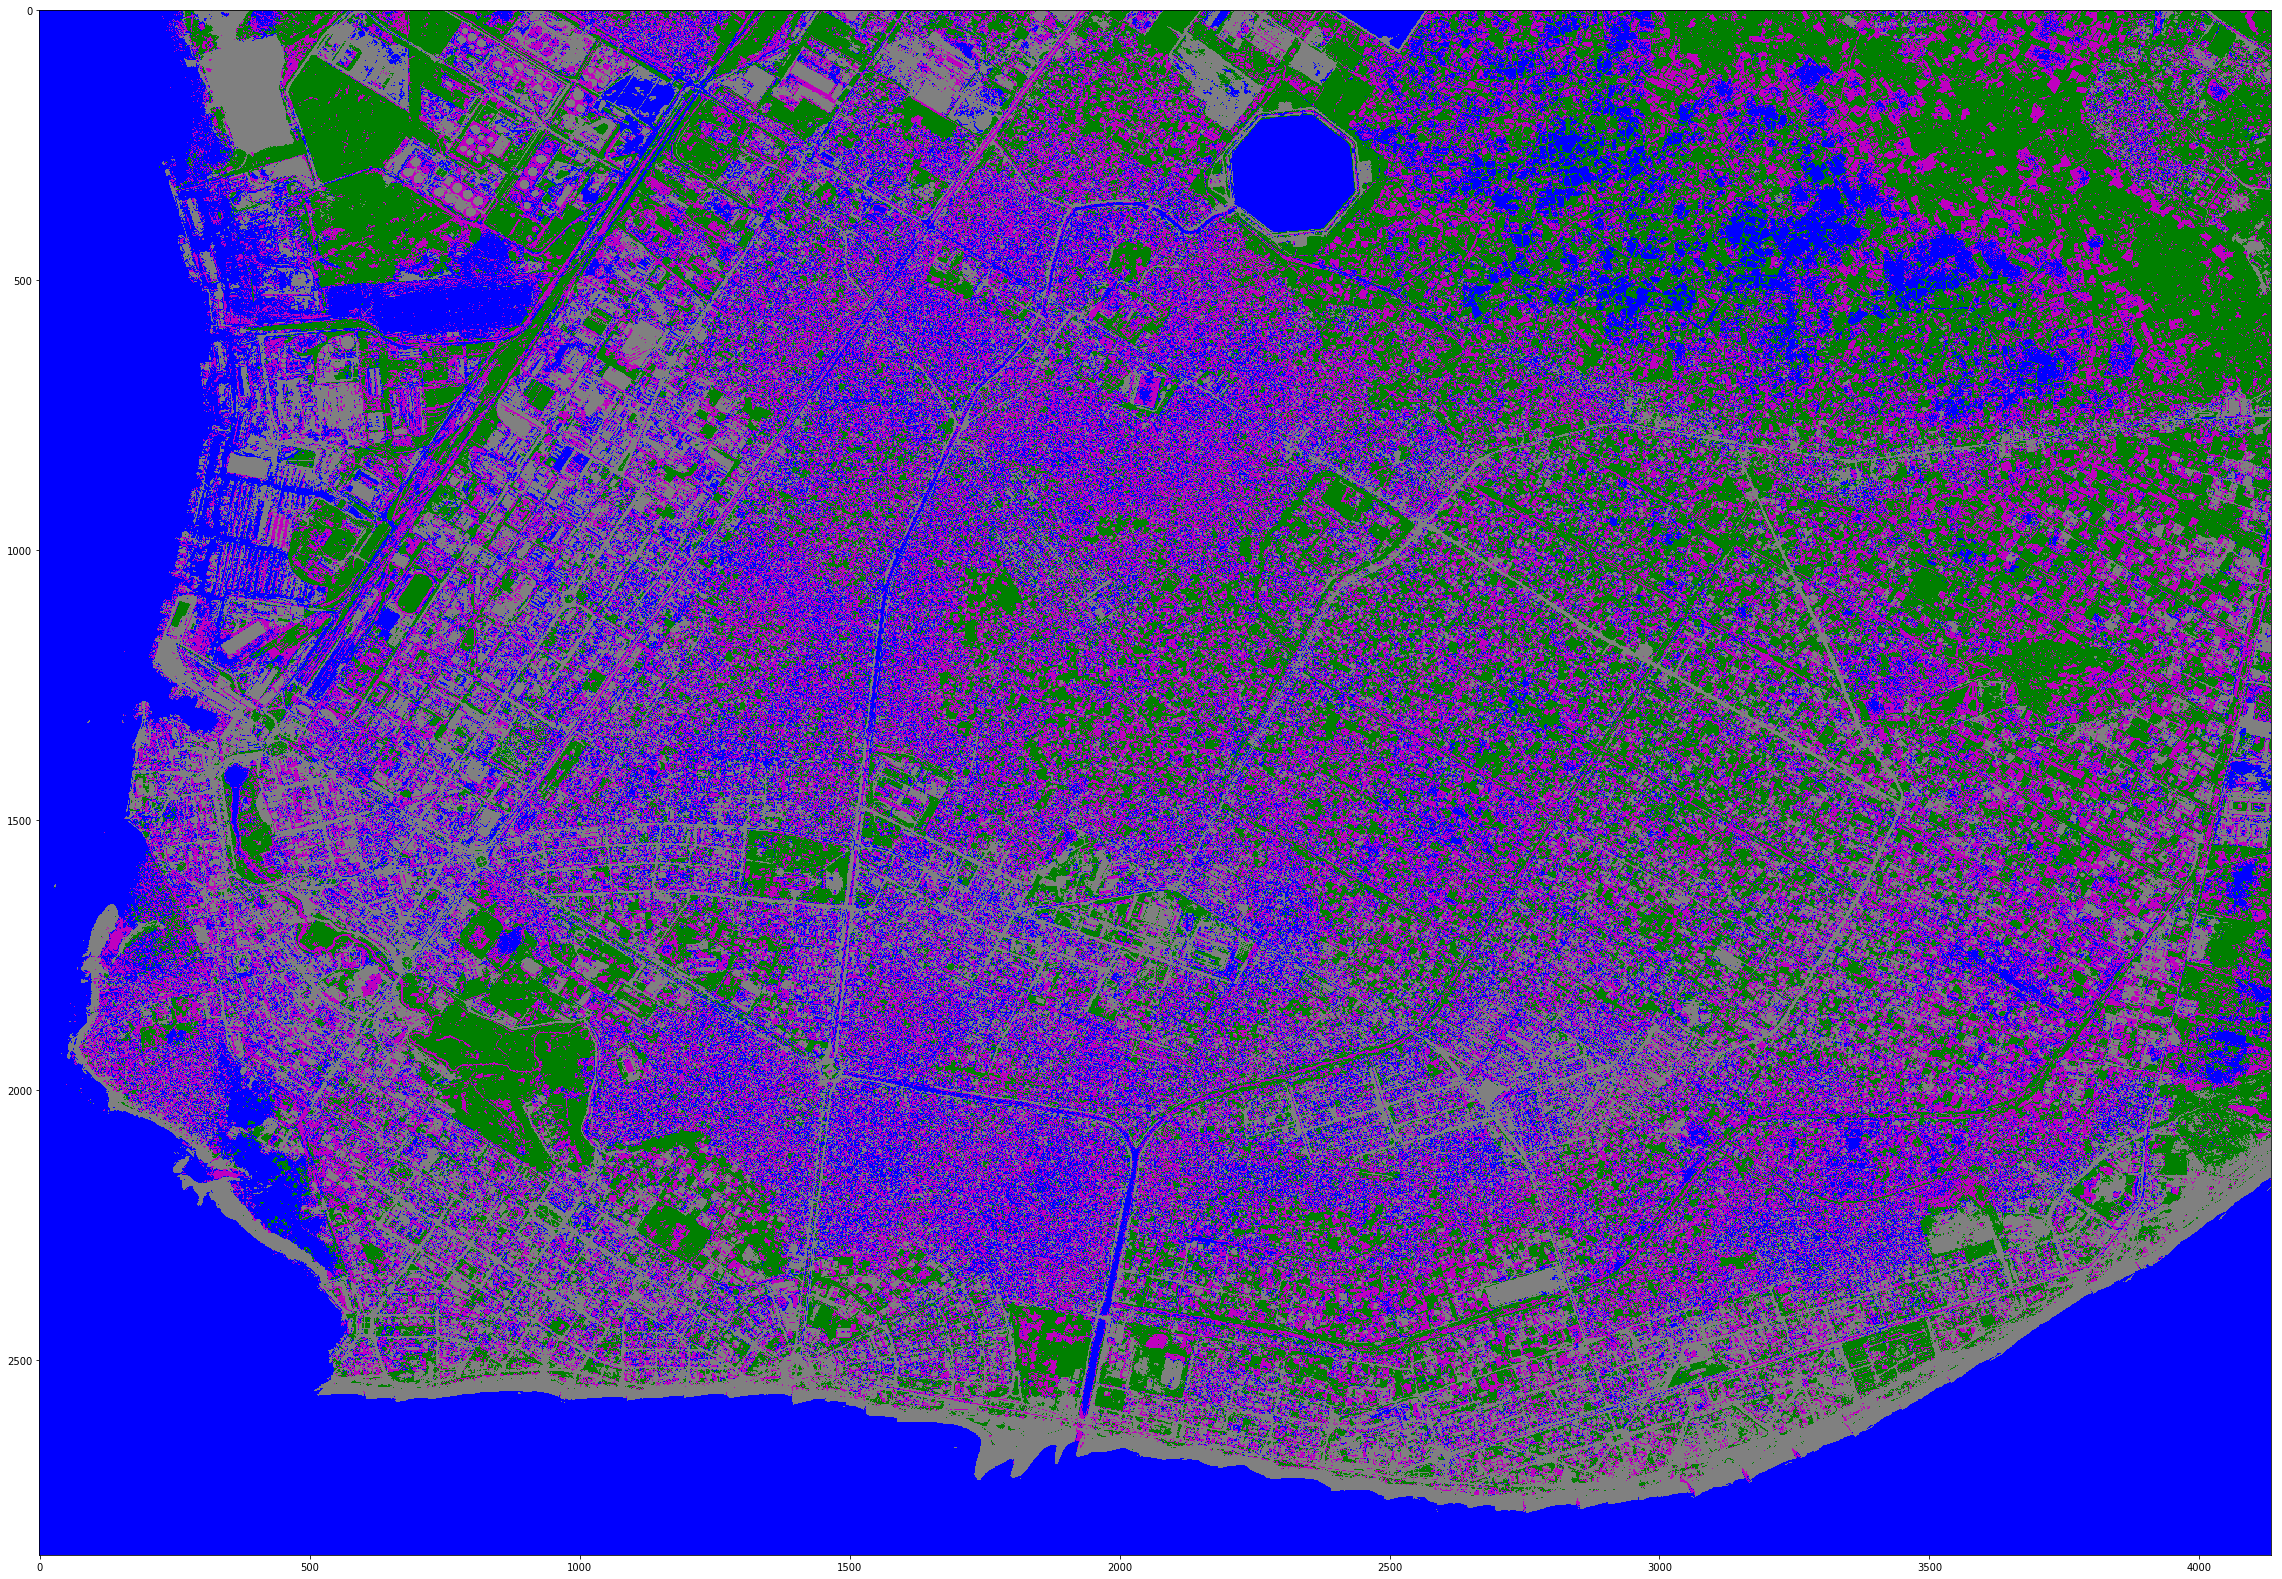

In [13]:
# Plot result
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data_random_forest = predictedClass.reshape(index_im.shape[:2])
cmap = ListedColormap(['m','blue','green','grey'])
im = ax.imshow(pred_data_random_forest,cmap=cmap)
print(np.unique(pred_data))
plt.show()

# Write out result
with rio.open(svm_outputs_path+'random_forest_map_updated.tif', 'w', **files_out_meta) as dst:
    dst.write(pred_data_random_forest.astype('float32'),1)

# Change visualization so "shadow" is presented as vegetation instead

[1 2 3 4]


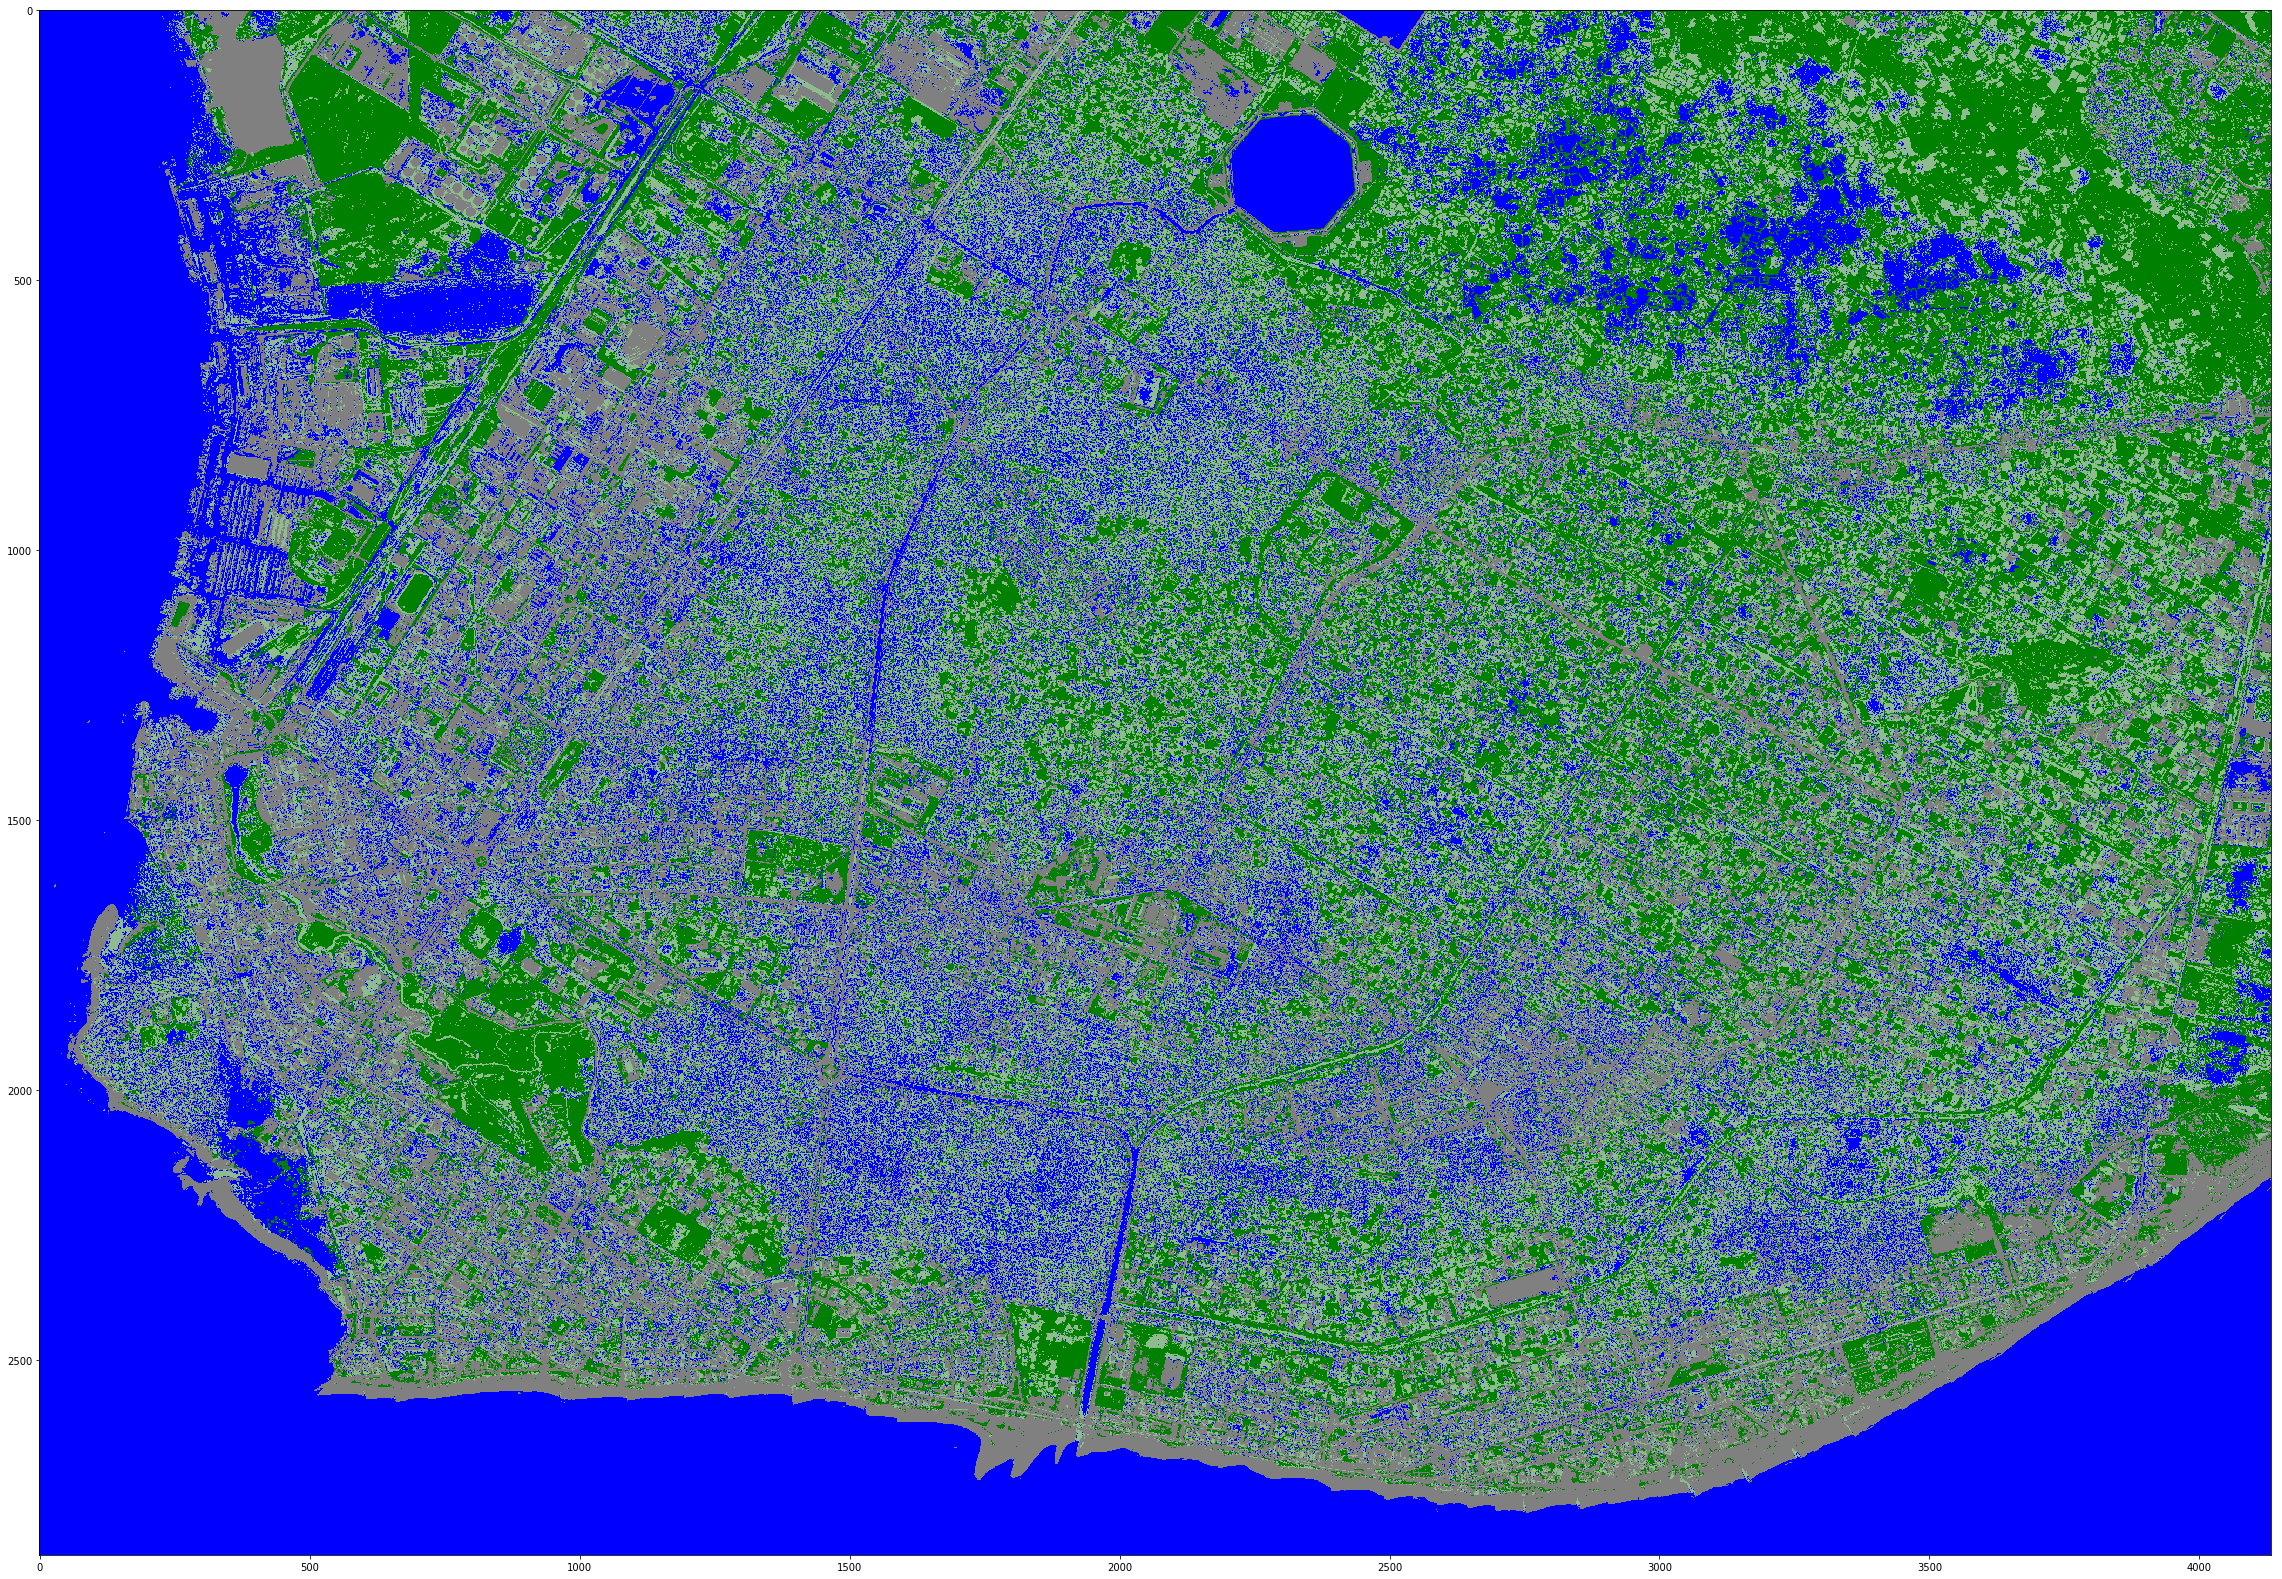

In [14]:
# Plot result
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (40,40))
pred_data_random_forest = predictedClass.reshape(index_im.shape[:2])
cmap = ListedColormap(['darkseagreen','blue','green','grey'])
im = ax.imshow(pred_data_random_forest,cmap=cmap)
print(np.unique(pred_data))
plt.show()

# Write out result
with rio.open(svm_outputs_path+'random_forest_map_updated.tif', 'w', **files_out_meta) as dst:
    dst.write(pred_data_random_forest.astype('float32'),1)